<a href="https://colab.research.google.com/github/subupkrl/Python/blob/master/DS_Day10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
file_path = "/content/drive/MyDrive/trainsent.csv"
df = pd.read_csv(file_path,encoding='latin1')
df.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [13]:
def sentiment_color(val):
  if val == 'positive':
    color = 'green'
  elif val == 'negative':
    color = 'red'
  else:
    color = 'lightblue'
  return f'background-color: {color}'

#styled dataframe
df_styled = df.head(10).style.map(sentiment_color, subset=['sentiment'])
df_styled

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.000000,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.000000,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.000000,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.000000,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on the releases we already bought","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.000000,26
5,28b57f3990,http://www.dothebouncy.com/smf - some shameless plugging for the best Rangers forum on earth,http://www.dothebouncy.com/smf - some shameless plugging for the best Rangers forum on earth,neutral,night,70-100,Antigua and Barbuda,97929,440.000000,223
6,6e0c6d75b1,2am feedings for the baby are fun when he is all smiles and coos,fun,positive,morning,0-20,Argentina,45195774,2736690.000000,17
7,50e14c0bb8,Soooo high,Soooo high,neutral,noon,21-30,Armenia,2963243,28470.000000,104
8,e050245fbd,Both of you,Both of you,neutral,night,31-45,Australia,25499884,7682300.000000,3
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe... (is that possible!?),Wow... u just became cooler.,positive,morning,46-60,Austria,9006398,82400.000000,109


In [17]:
#cleaning of data where necessary
def clean_sentiment_data(df):
  #create a copy to avoid modifying original data
  df_clean = df.copy() #euta variable to data arko ma lagna paryo vaney variable_name.copy

  #remove any duplicates rows
  df_clean.drop_duplicates(inplace=True)

  #remove any rows with missing values
  df_clean.dropna(inplace=True)

  #strip whitespace from text columns
  df_clean['text'] = df_clean['text'].str.strip()

  #convert sentiment to lowercase
  df_clean['sentiment'] = df_clean['sentiment'].str.lower()

  #remove rows where text is empty after stripping
  df_clean = df_clean[df_clean['text'] != '']  #array box with condition is boolean indexing
  return df_clean

clean_data = clean_sentiment_data(df)
print(clean_data.shape)
print(df.shape)


(27480, 10)
(27481, 10)


/tmp/ipython-input-1789813160.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = sentiment_counts.index,


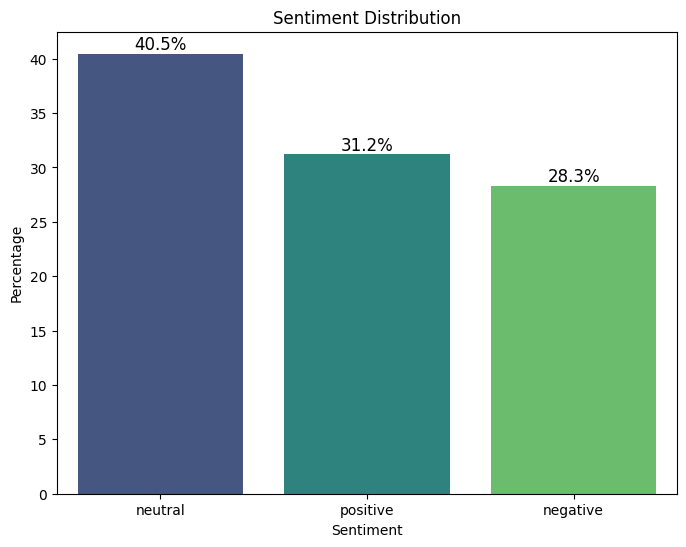

In [19]:
#plotting the above data
import matplotlib.pyplot as plt
import seaborn as sns
sentiment_counts = clean_data['sentiment'].value_counts(normalize=True)*100
plt.figure(figsize = (8,6))
ax = sns.barplot(x = sentiment_counts.index,
                 y = sentiment_counts.values,
                 palette = 'viridis')

#add percentage labels to bar
for p in ax.patches:
  width = p.get_width()
  height = p.get_height()
  ax.annotate(f'{height:.1f}%',
              (p.get_x() + width/2, height),
              ha = 'center',
              va = 'bottom',
              fontsize = 12)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.show()

Text(0.5, 1.0, 'Positive Sentiment Word Cloud')

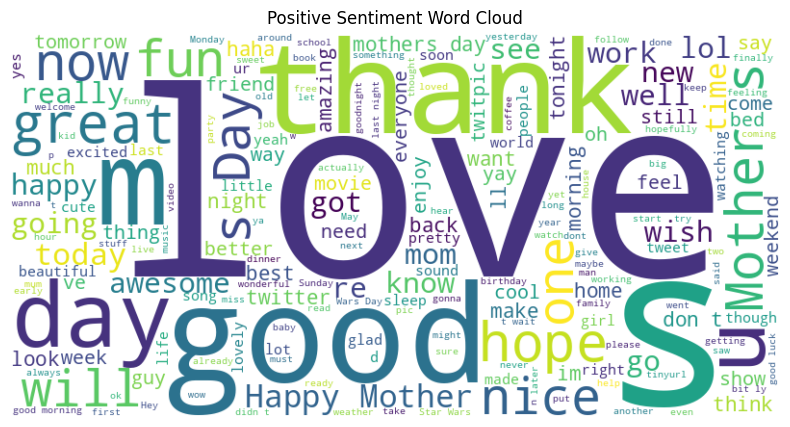

In [23]:
#filter positive sentiment
from wordcloud import WordCloud,STOPWORDS
positive_reviews = clean_data[clean_data['sentiment'] == 'positive']

#combine all positive text
positive_text = ''.join(positive_reviews['text'])

#create a wordcloud object
wordcloud = WordCloud(width = 800,height = 400,background_color = 'white',stopwords = STOPWORDS).generate(positive_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Sentiment Word Cloud')

Text(0.5, 1.0, 'Negative sentiment word cloud')

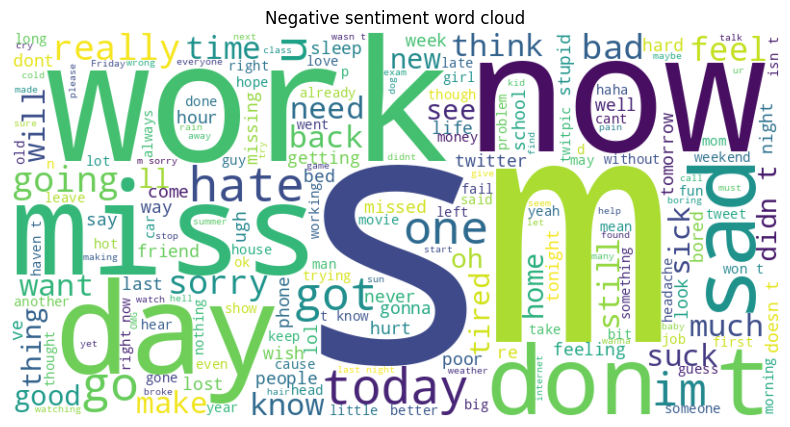

In [24]:
#negative reviews
negative_reviews = clean_data[clean_data['sentiment'] == 'negative']

negative_text = ''.join(negative_reviews['text'])

wordcloud = WordCloud(width = 800,height = 400,background_color = 'white',stopwords = STOPWORDS).generate(negative_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative sentiment word cloud')

Text(0.5, 1.0, 'Neutral sentiment word cloud')

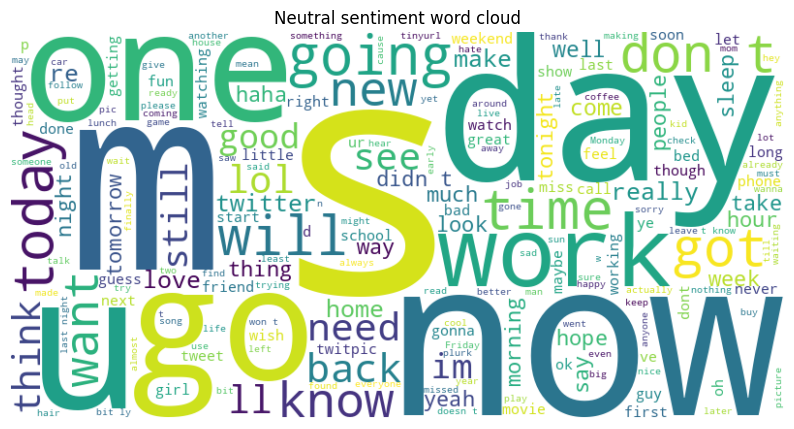

In [25]:
#neutral review
neutral_reviews = clean_data[clean_data['sentiment'] == 'neutral']

neutral_text = ''.join(neutral_reviews['text'])

wordcloud = WordCloud(width = 800,height = 400,background_color = 'white',stopwords = STOPWORDS).generate(neutral_text)

plt.figure(figsize = (10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Neutral sentiment word cloud')


In [29]:
def lower_text_data(df):
  df['text_lower'] = df['text'].str.lower()
  return df
df1 = lower_text_data(clean_data)
print(df1)

#simplifies analysis, improve mode performance
#use case: text classification, sentiment analysis, information retrieval, natural language processing

           textID                                               text  \
0      cb774db0d1                I`d have responded, if I were going   
1      549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2      088c60f138                          my boss is bullying me...   
3      9642c003ef                     what interview! leave me alone   
4      358bd9e861  Sons of ****, why couldn`t they put them on th...   
...           ...                                                ...   
27476  4eac33d1c0  wish we could come see u on Denver  husband lo...   
27477  4f4c4fc327  I`ve wondered about rake to.  The client has m...   
27478  f67aae2310  Yay good for both of you. Enjoy the break - yo...   
27479  ed167662a5                         But it was worth it  ****.   
27480  6f7127d9d7  All this flirting going on - The ATG smiles. Y...   

                                           selected_text sentiment  \
0                    I`d have responded, if I were going   neutra

In [35]:
#import special character
import re
def remove_special_char(df):
  df['text_clean'] = df['text'].apply(lambda x: re.sub(r'["^a-zA-Z0-9\s"]', '', x))
  return df
df2 = remove_special_char(df1)
print(df2)

           textID                                               text  \
0      cb774db0d1                I`d have responded, if I were going   
1      549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2      088c60f138                          my boss is bullying me...   
3      9642c003ef                     what interview! leave me alone   
4      358bd9e861  Sons of ****, why couldn`t they put them on th...   
...           ...                                                ...   
27476  4eac33d1c0  wish we could come see u on Denver  husband lo...   
27477  4f4c4fc327  I`ve wondered about rake to.  The client has m...   
27478  f67aae2310  Yay good for both of you. Enjoy the break - yo...   
27479  ed167662a5                         But it was worth it  ****.   
27480  6f7127d9d7  All this flirting going on - The ATG smiles. Y...   

                                           selected_text sentiment  \
0                    I`d have responded, if I were going   neutra

In [37]:
#removing url
def removing_url():
  df['text_url'] = df['text'].apply(lambda x: re.sub(r'[http\Swww\S.com\S]','',x))
  return df
df3 = removing_url(df2)
print(df3)


TypeError: removing_url() takes 0 positional arguments but 1 was given

In [67]:
#word tokenize
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

df['token'] =df['text'].astype(str).apply(word_tokenize)
print(df['token'])


0        [I, `, d, have, responded, ,, if, I, were, going]
1        [Sooo, SAD, I, will, miss, you, here, in, San,...
2                        [my, boss, is, bullying, me, ...]
3                   [what, interview, !, leave, me, alone]
4        [Sons, of, *, *, *, *, ,, why, couldn, `, t, t...
                               ...                        
27476    [wish, we, could, come, see, u, on, Denver, hu...
27477    [I, `, ve, wondered, about, rake, to, ., The, ...
27478    [Yay, good, for, both, of, you, ., Enjoy, the,...
27479             [But, it, was, worth, it, *, *, *, *, .]
27480    [All, this, flirting, going, on, -, The, ATG, ...
Name: token, Length: 27481, dtype: object


In [68]:
#lemmatize word
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer


lemmatizer = WordNetLemmatizer()
df["lemmatized_word"] = (df["token"].apply(lambda x: [lemmatizer.lemmatize(word,pos = 'v') for word in x]))
print(df["lemmatized_word"])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0               [I, `, d, have, respond, ,, if, I, be, go]
1        [Sooo, SAD, I, will, miss, you, here, in, San,...
2                           [my, boss, be, bully, me, ...]
3                   [what, interview, !, leave, me, alone]
4        [Sons, of, *, *, *, *, ,, why, couldn, `, t, t...
                               ...                        
27476    [wish, we, could, come, see, u, on, Denver, hu...
27477    [I, `, ve, wonder, about, rake, to, ., The, cl...
27478    [Yay, good, for, both, of, you, ., Enjoy, the,...
27479              [But, it, be, worth, it, *, *, *, *, .]
27480    [All, this, flirt, go, on, -, The, ATG, smile,...
Name: lemmatized_word, Length: 27481, dtype: object


In [74]:
#remove stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = stopwords.words('english')
df['stop_words']= df['lemmatized_word'].apply(lambda x: [word for word in x if word not in stop_words])
print(df['stop_words'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0                                [I, `, respond, ,, I, go]
1                [Sooo, SAD, I, miss, San, Diego, !, !, !]
2                                       [boss, bully, ...]
3                             [interview, !, leave, alone]
4        [Sons, *, *, *, *, ,, `, put, release, already...
                               ...                        
27476    [wish, could, come, see, u, Denver, husband, l...
27477    [I, `, wonder, rake, ., The, client, make, cle...
27478    [Yay, good, ., Enjoy, break, -, probably, need...
27479                          [But, worth, *, *, *, *, .]
27480    [All, flirt, go, -, The, ATG, smile, ., Yay, ....
Name: stop_words, Length: 27481, dtype: object


In [77]:
#encoding
data = pd.DataFrame(df['sentiment'])
sentiment_mapping = {'Positive': 1, 'Negative': 2, 'Neutral': 3}
print(sentiment_mapping)

{'Positive': 1, 'Negative': 2, 'Neutral': 3}
